# Imports

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


import os

In [177]:
display_analysis = True
flag_extract_mfcc = False

In [178]:
original_features_df = pd.read_csv("../data/tables/mdvr_original_featuers.csv")
features_df = original_features_df

In [179]:
features_df.head()

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,0.260998,114.559712,11.523052,14.191471,0.028422,0.000247,0.013444,0.013165,0.040333,0.125351,1.395256,0.038164,0.068821,0.175988,0.114493,1.0
1,0.632993,244.628674,18.861410,20.751485,0.011556,0.000047,0.004619,0.005859,0.013858,0.053902,0.492988,0.021755,0.031201,0.069907,0.065264,1.0
2,0.844989,223.685833,62.412158,15.327212,0.020620,0.000093,0.009925,0.007579,0.029775,0.063626,0.763410,0.025858,0.028366,0.040768,0.077573,1.0
3,1.274989,132.029628,12.062114,12.557775,0.017816,0.000135,0.007793,0.008405,0.023378,0.083822,0.738992,0.030570,0.050306,0.094678,0.091711,1.0
4,1.611995,175.314689,15.264781,13.798862,0.013002,0.000074,0.005781,0.007909,0.017344,0.104535,1.010369,0.036758,0.062875,0.132731,0.110275,1.0


# Data Exploration

In [180]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             814 non-null    float64
 1   meanF0               810 non-null    float64
 2   stdevF0              809 non-null    float64
 3   hnr                  814 non-null    float64
 4   localJitter          810 non-null    float64
 5   localabsoluteJitter  810 non-null    float64
 6   rapJitter            809 non-null    float64
 7   ppq5Jitter           808 non-null    float64
 8   ddpJitter            809 non-null    float64
 9   localShimmer         809 non-null    float64
 10  localdbShimmer       809 non-null    float64
 11  apq3Shimmer          809 non-null    float64
 12  aqpq5Shimmer         806 non-null    float64
 13  apq11Shimmer         791 non-null    float64
 14  ddaShimmer           809 non-null    float64
 15  PD                   814 non-null    flo

In [181]:
features_df.dropna(subset=['meanF0'], inplace=True)
features_df.dropna(subset=['stdevF0'], inplace=True)
features_df.dropna(subset=['hnr'], inplace=True)
features_df.dropna(subset=['localJitter'], inplace=True)
features_df.dropna(subset=['localabsoluteJitter'], inplace=True)
features_df.dropna(subset=['rapJitter'], inplace=True)
features_df.dropna(subset=['ppq5Jitter'], inplace=True)
features_df.dropna(subset=['ddpJitter'], inplace=True)
features_df.dropna(subset=['localShimmer'], inplace=True)
features_df.dropna(subset=['localdbShimmer'], inplace=True)
features_df.dropna(subset=['apq3Shimmer'], inplace=True)
features_df.dropna(subset=['aqpq5Shimmer'], inplace=True)
features_df.dropna(subset=['apq11Shimmer'], inplace=True)
if flag_extract_mfcc:
    features_df.dropna(subset=['mfcc0'], inplace=True)
    features_df.dropna(subset=['mfcc1'], inplace=True)
    features_df.dropna(subset=['mfcc2'], inplace=True)
    features_df.dropna(subset=['mfcc3'], inplace=True)
    features_df.dropna(subset=['mfcc4'], inplace=True)
    features_df.dropna(subset=['mfcc5'], inplace=True)
    features_df.dropna(subset=['mfcc6'], inplace=True)
    features_df.dropna(subset=['mfcc7'], inplace=True)
    features_df.dropna(subset=['mfcc8'], inplace=True)
    features_df.dropna(subset=['mfcc9'], inplace=True)
    features_df.dropna(subset=['mfcc10'], inplace=True)
    features_df.dropna(subset=['mfcc11'], inplace=True)
    features_df.dropna(subset=['mfcc12'], inplace=True)
    features_df.dropna(subset=['PD'], inplace=True)

features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 813
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Duration             791 non-null    float64
 1   meanF0               791 non-null    float64
 2   stdevF0              791 non-null    float64
 3   hnr                  791 non-null    float64
 4   localJitter          791 non-null    float64
 5   localabsoluteJitter  791 non-null    float64
 6   rapJitter            791 non-null    float64
 7   ppq5Jitter           791 non-null    float64
 8   ddpJitter            791 non-null    float64
 9   localShimmer         791 non-null    float64
 10  localdbShimmer       791 non-null    float64
 11  apq3Shimmer          791 non-null    float64
 12  aqpq5Shimmer         791 non-null    float64
 13  apq11Shimmer         791 non-null    float64
 14  ddaShimmer           791 non-null    float64
 15  PD                   791 non-null    float64


All types are consistent and no null values

### verifying duplicates

In [182]:
features_df[features_df.duplicated()]

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD


no duplicates

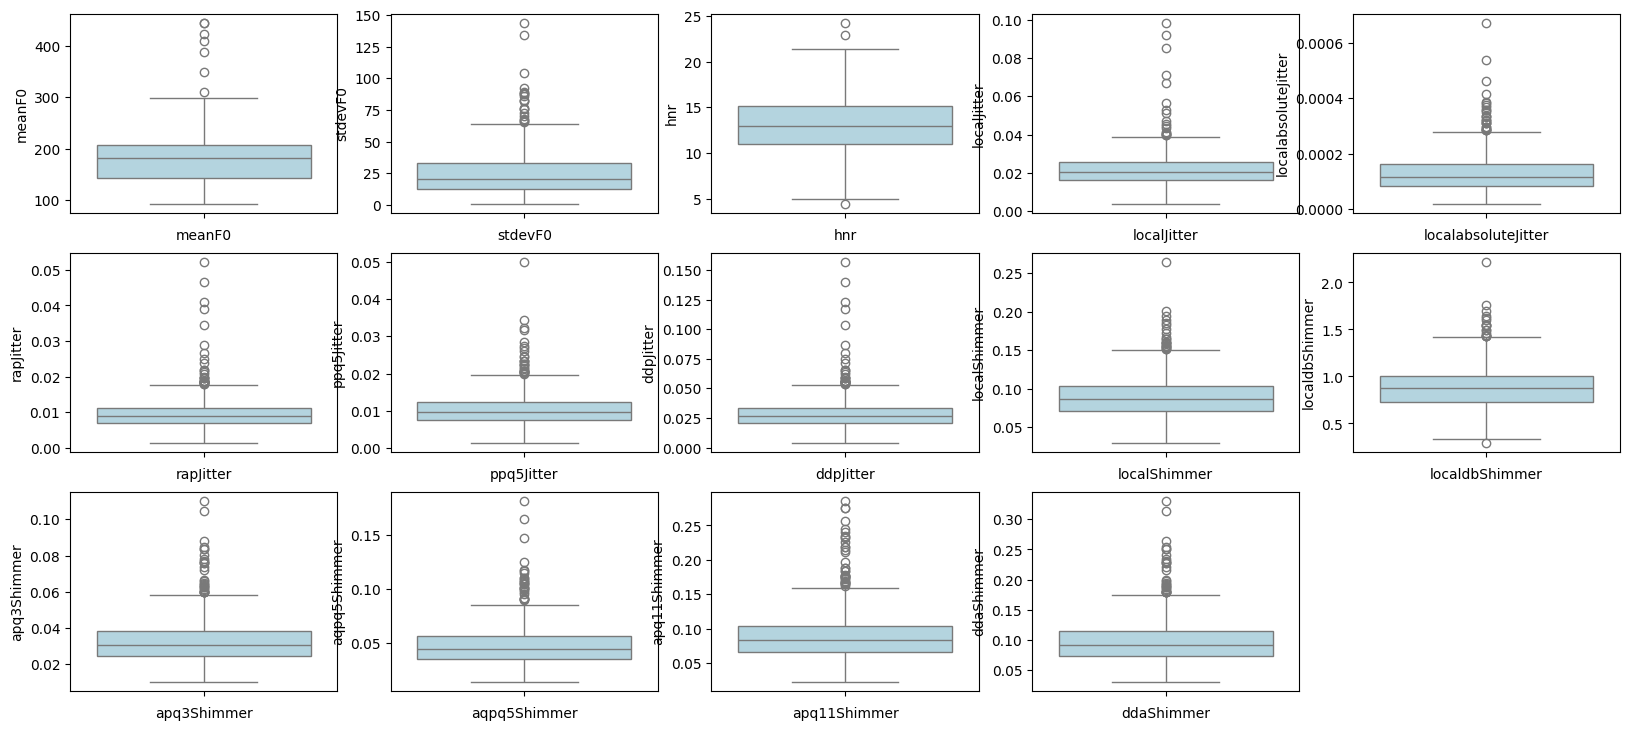

In [183]:
def displayBoxplots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(features_df["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(features_df["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(features_df["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(features_df["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(features_df["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(features_df["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(features_df["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(features_df["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(features_df["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(features_df["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(features_df["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(features_df["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(features_df["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(features_df["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    displayBoxplots()


Some outliers, mostly above the plots

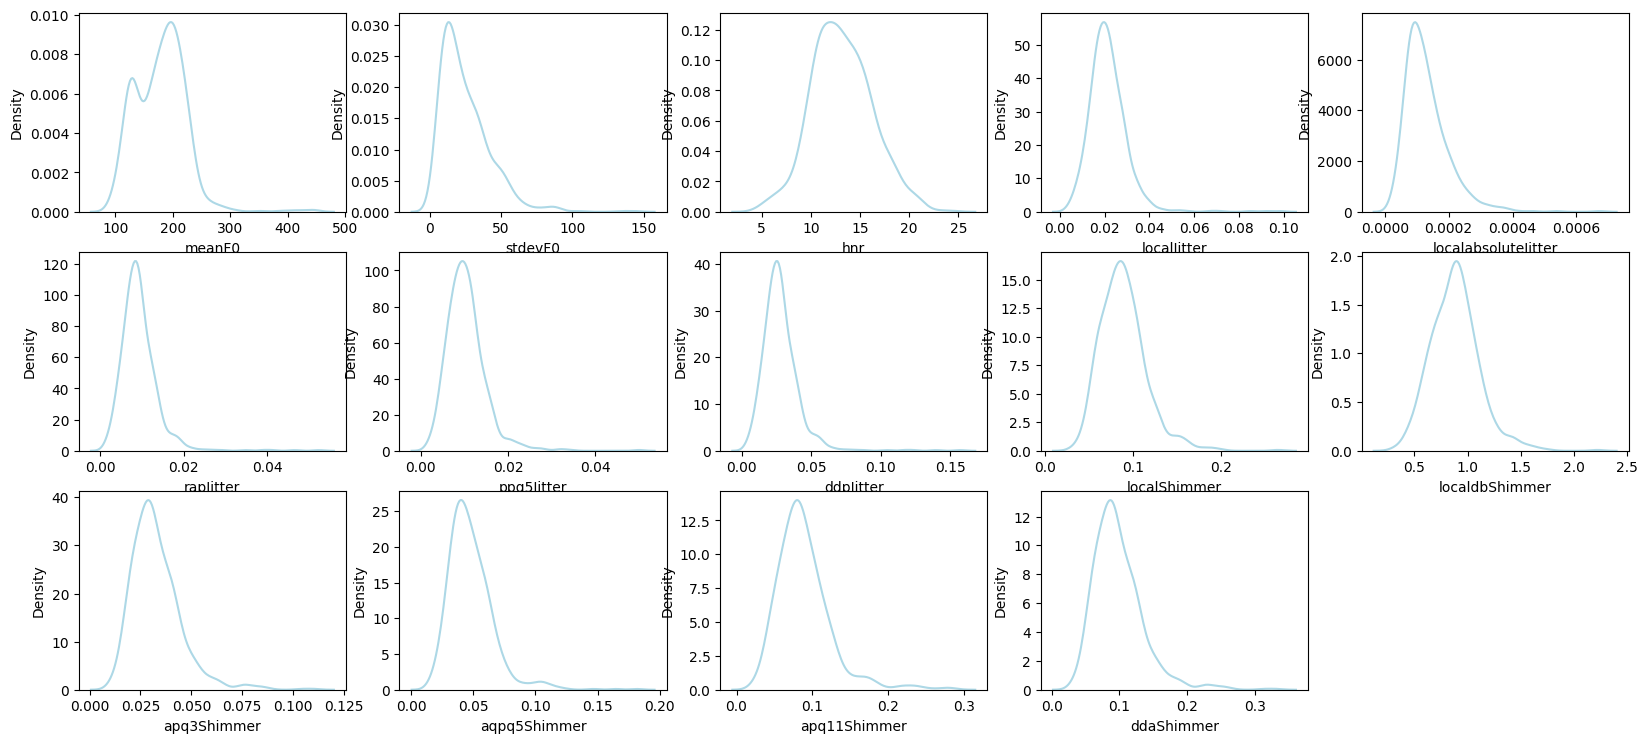

In [184]:
def getKdeplots():
    plt.figure(figsize=(20, 15))
    plt.subplot(5,5,1)
    sns.kdeplot(features_df["meanF0"], color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.kdeplot(features_df["stdevF0"], color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.kdeplot(features_df["hnr"],color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.kdeplot(features_df["localJitter"],color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.kdeplot(features_df["localabsoluteJitter"],color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.kdeplot(features_df["rapJitter"],color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.kdeplot(features_df["ppq5Jitter"],color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.kdeplot(features_df["ddpJitter"],color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.kdeplot(features_df["localShimmer"],color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.kdeplot(features_df["localdbShimmer"],color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.kdeplot(features_df["apq3Shimmer"],color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.kdeplot(features_df["aqpq5Shimmer"],color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.kdeplot(features_df["apq11Shimmer"],color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.kdeplot(features_df["ddaShimmer"],color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    getKdeplots()


# Bivariate analysis

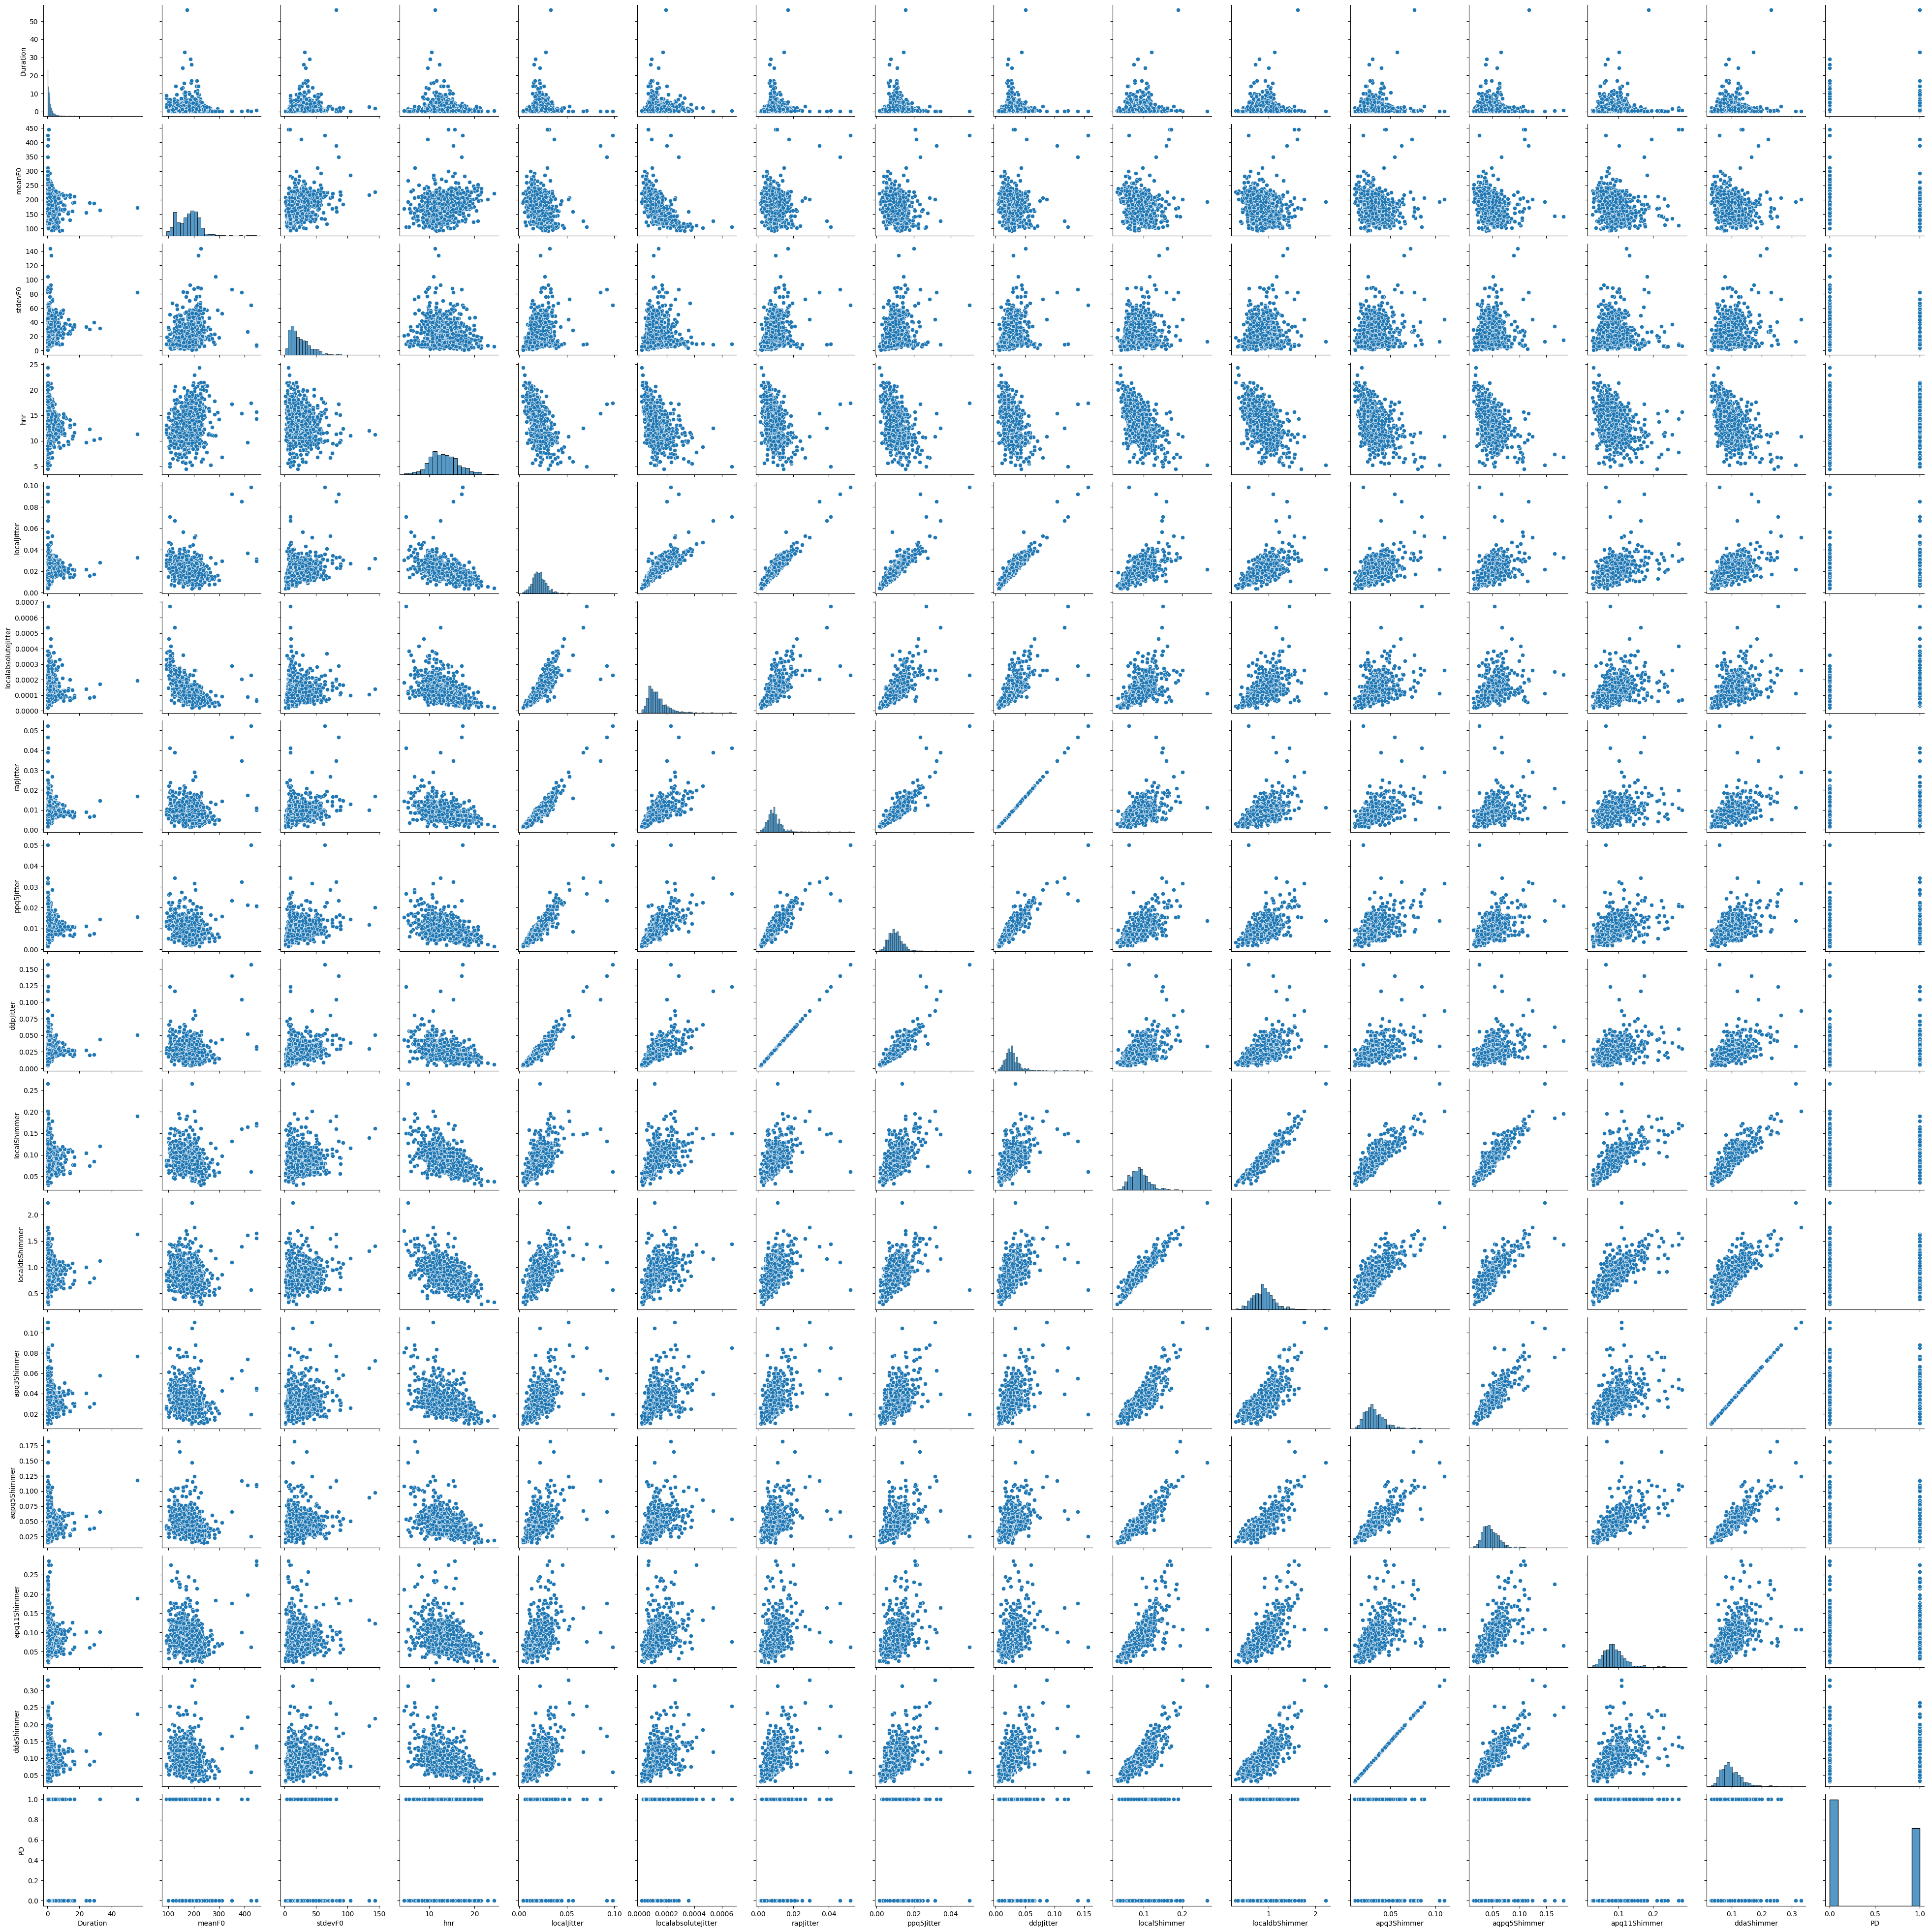

In [185]:
if display_analysis:
    sns.pairplot(features_df)  #pairplot
    plt.show()

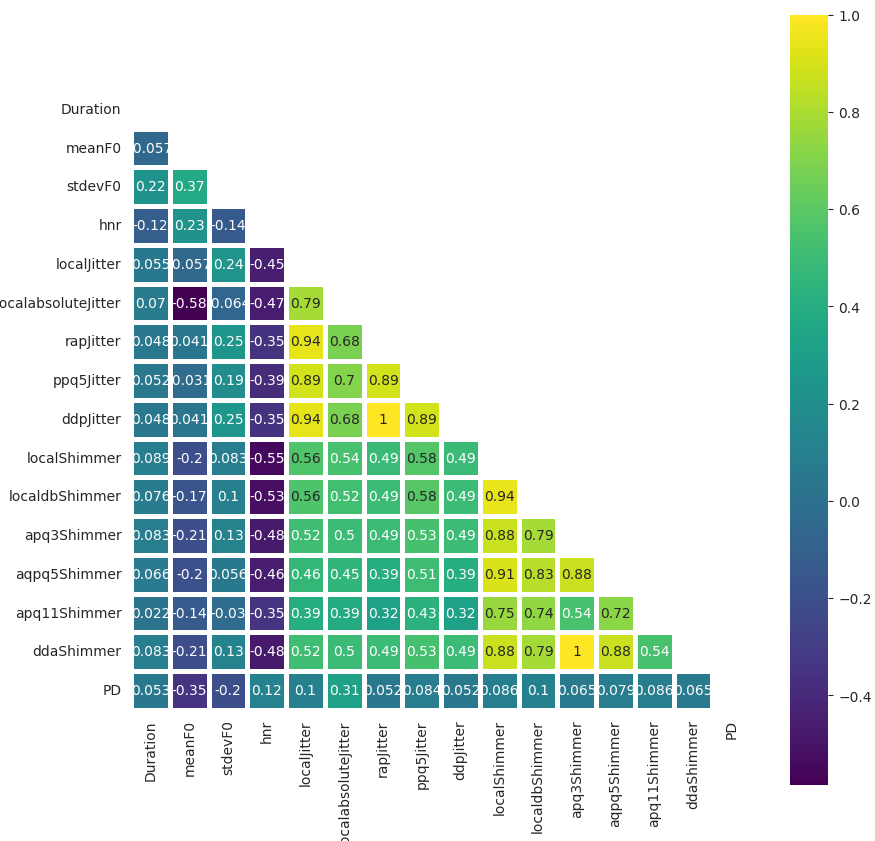

In [186]:
correlation = original_features_df.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation,mask=mask,square=True,linewidths=2.5,cmap="viridis",annot=True)

(16.5, -0.5)

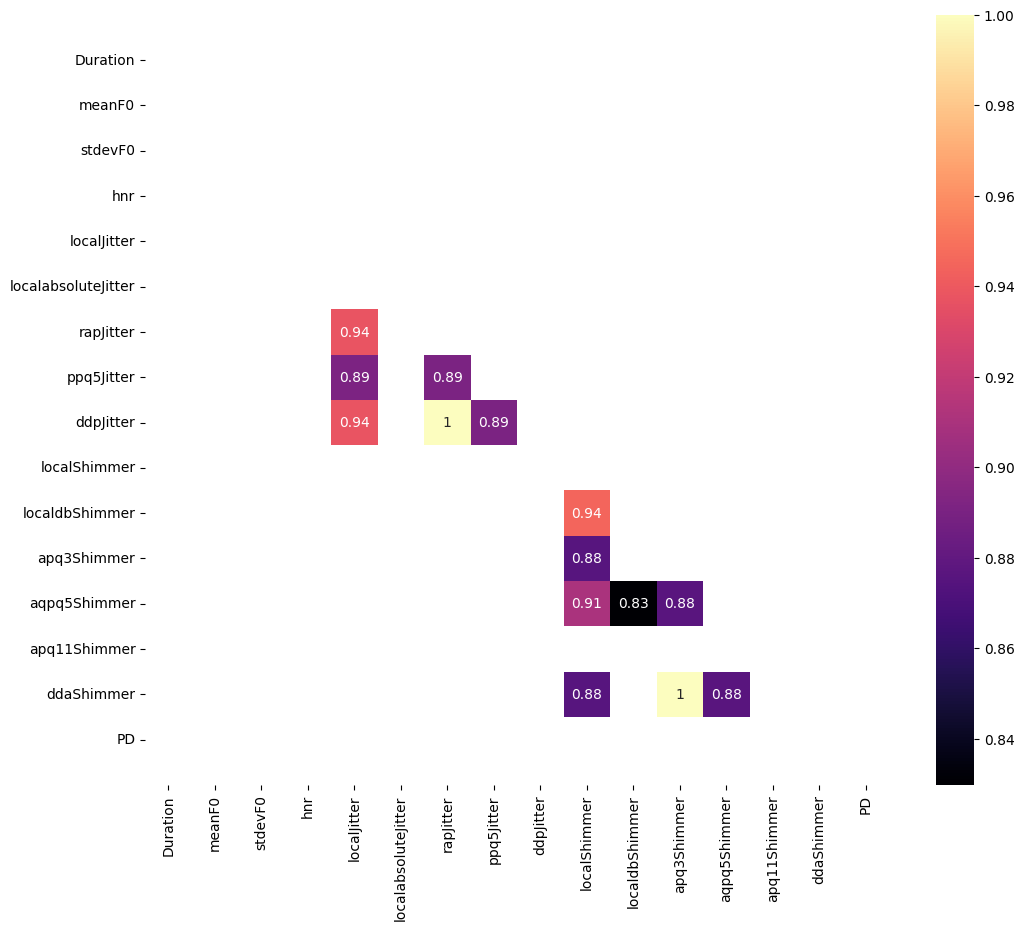

In [187]:
plt.figure(figsize=(12, 10))
df_corr = original_features_df.corr(method='pearson')
matrix = np.triu(df_corr)
ax = sns.heatmap(df_corr[(df_corr >= 0.80) | (df_corr <= -0.80)], annot=True, cmap='magma', mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [188]:
print("number of parkinson people in the dataset ",len(features_df.loc[features_df["PD"]==1]))
print("number of Healthy people in the dataset ",len(features_df.loc[features_df["PD"]==0]))

number of parkinson people in the dataset  334
number of Healthy people in the dataset  457


# Pre-processing

In [189]:
features_df

,Duration,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,0.260998,114.559712,11.523052,14.191471,0.028422,0.000247,0.013444,0.013165,0.040333,0.125351,1.395256,0.038164,0.068821,0.175988,0.114493,1.0
1,0.632993,244.628674,18.861410,20.751485,0.011556,0.000047,0.004619,0.005859,0.013858,0.053902,0.492988,0.021755,0.031201,0.069907,0.065264,1.0
2,0.844989,223.685833,62.412158,15.327212,0.020620,0.000093,0.009925,0.007579,0.029775,0.063626,0.763410,0.025858,0.028366,0.040768,0.077573,1.0
3,1.274989,132.029628,12.062114,12.557775,0.017816,0.000135,0.007793,0.008405,0.023378,0.083822,0.738992,0.030570,0.050306,0.094678,0.091711,1.0
4,1.611995,175.314689,15.264781,13.798862,0.013002,0.000074,0.005781,0.007909,0.017344,0.104535,1.010369,0.036758,0.062875,0.132731,0.110275,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.959002,193.209988,22.001734,13.987776,0.016422,0.000085,0.007082,0.009177,0.021245,0.086505,0.940830,0.033335,0.049701,0.091187,0.100005,0.0
810,1.102993,117.653228,8.975167,12.096987,0.023460,0.000199,0.009138,0.011369,0.027414,0.093464,0.816516,0.031271,0.048431,0.106553,0.093812,0.0
811,1.466009,209.829420,75.861320,7.536627,0.027930,0.000133,0.012246,0.014303,0.036737,0.112934,1.155289,0.041220,0.058284,0.105104,0.123659,0.0
812,1.248005,153.326690,19.930532,12.334277,0.033035,0.000215,0.014089,0.017080,0.042266,0.076875,0.762129,0.023152,0.036592,0.071444,0.069456,0.0


In [190]:
features_df.drop('Duration', axis=1, inplace=True)

Drop the "Duration" column.

### Outlier treatment

In [191]:
def outliearTreatment(df):
    '''
    Any values greater than the whisker (3IQ) are set to the whisker value, 
    and any values lower than the LowerBound (1IQ) are set to the LowerBound.
    '''
    cols = list(df.columns)
    cols.remove('PD')
    for columnName in cols:
        Q1 = df[columnName].quantile(0.25)
        Q3 = df[columnName].quantile(0.75)
        IQR = Q3 - Q1
        whisker = Q1 + 1.5 * IQR
        LowerBound = Q1- 1.5 * IQR
        df[columnName] = df[columnName].apply(lambda x : whisker if x>whisker else x)
        df[columnName] = df[columnName].apply(lambda x : LowerBound if x<LowerBound else x)
    return df

In [192]:
removed_outliers = outliearTreatment(features_df)


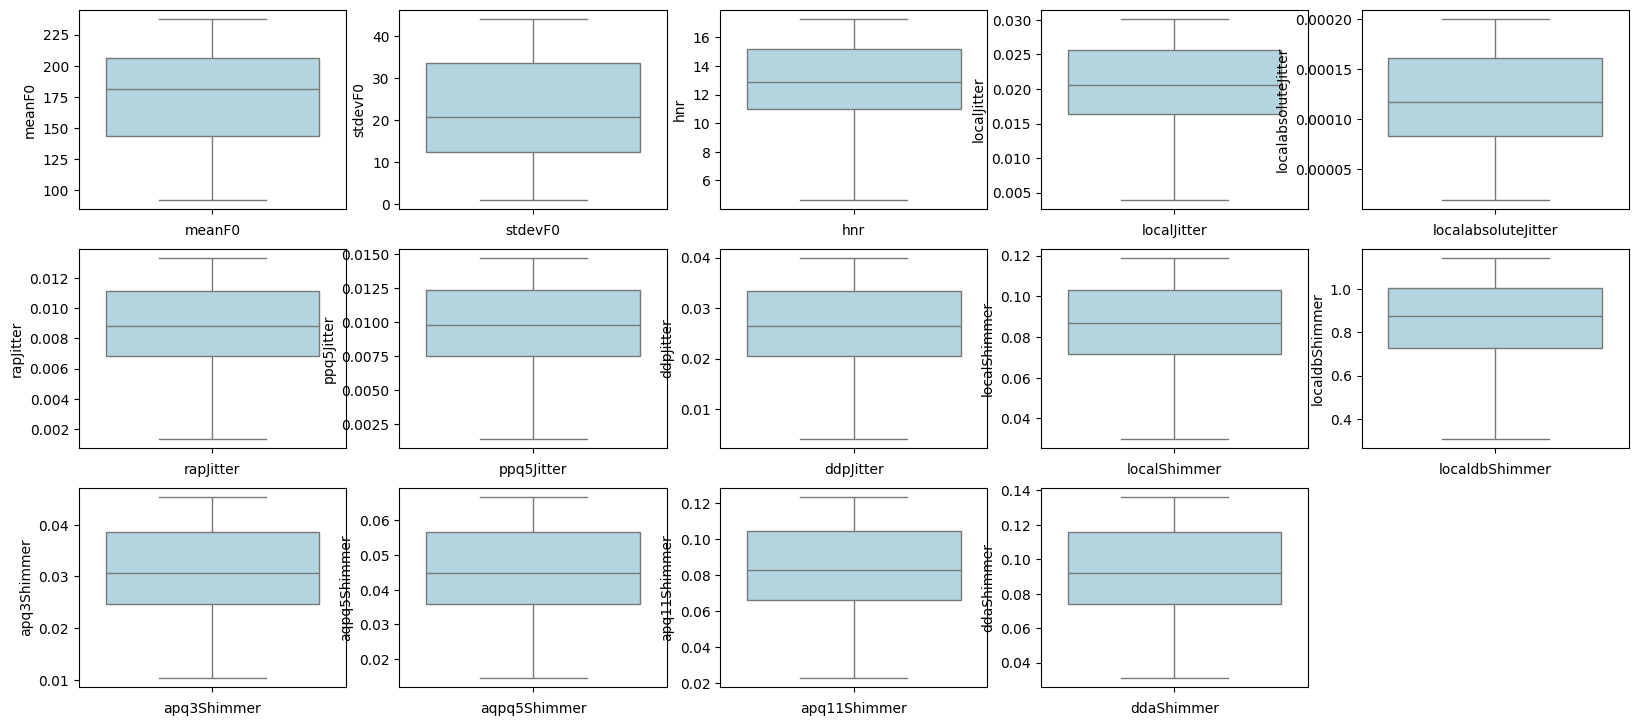

In [193]:
def showBoxPlots():
    plt.figure(figsize= (20,15))
    plt.subplot(5,5,1)
    sns.boxplot(removed_outliers["meanF0"],orient="v", color='lightblue')
    plt.xlabel('meanF0')

    plt.subplot(5,5,2)
    sns.boxplot(removed_outliers["stdevF0"],orient="v", color='lightblue')
    plt.xlabel('stdevF0')

    plt.subplot(5,5,3)
    sns.boxplot(removed_outliers["hnr"],orient="v", color='lightblue')
    plt.xlabel('hnr')

    plt.subplot(5,5,4)
    sns.boxplot(removed_outliers["localJitter"],orient="v", color='lightblue')
    plt.xlabel('localJitter')

    plt.subplot(5,5,5)
    sns.boxplot(removed_outliers["localabsoluteJitter"],orient="v", color='lightblue')
    plt.xlabel('localabsoluteJitter')

    plt.subplot(5,5,6)
    sns.boxplot(removed_outliers["rapJitter"],orient="v", color='lightblue')
    plt.xlabel('rapJitter')

    plt.subplot(5,5,7)
    sns.boxplot(removed_outliers["ppq5Jitter"],orient="v", color='lightblue')
    plt.xlabel('ppq5Jitter')

    plt.subplot(5,5,8)
    sns.boxplot(removed_outliers["ddpJitter"],orient="v", color='lightblue')
    plt.xlabel('ddpJitter')

    plt.subplot(5,5,9)
    sns.boxplot(removed_outliers["localShimmer"],orient="v", color='lightblue')
    plt.xlabel('localShimmer')

    plt.subplot(5,5,10)
    sns.boxplot(removed_outliers["localdbShimmer"],orient="v", color='lightblue')
    plt.xlabel('localdbShimmer')

    plt.subplot(5,5,11)
    sns.boxplot(removed_outliers["apq3Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq3Shimmer')

    plt.subplot(5,5,12)
    sns.boxplot(removed_outliers["aqpq5Shimmer"],orient="v", color='lightblue')
    plt.xlabel('aqpq5Shimmer')

    plt.subplot(5,5,13)
    sns.boxplot(removed_outliers["apq11Shimmer"],orient="v", color='lightblue')
    plt.xlabel('apq11Shimmer')

    plt.subplot(5,5,14)
    sns.boxplot(removed_outliers["ddaShimmer"],orient="v", color='lightblue')
    plt.xlabel('ddaShimmer')

if display_analysis:
    showBoxPlots()


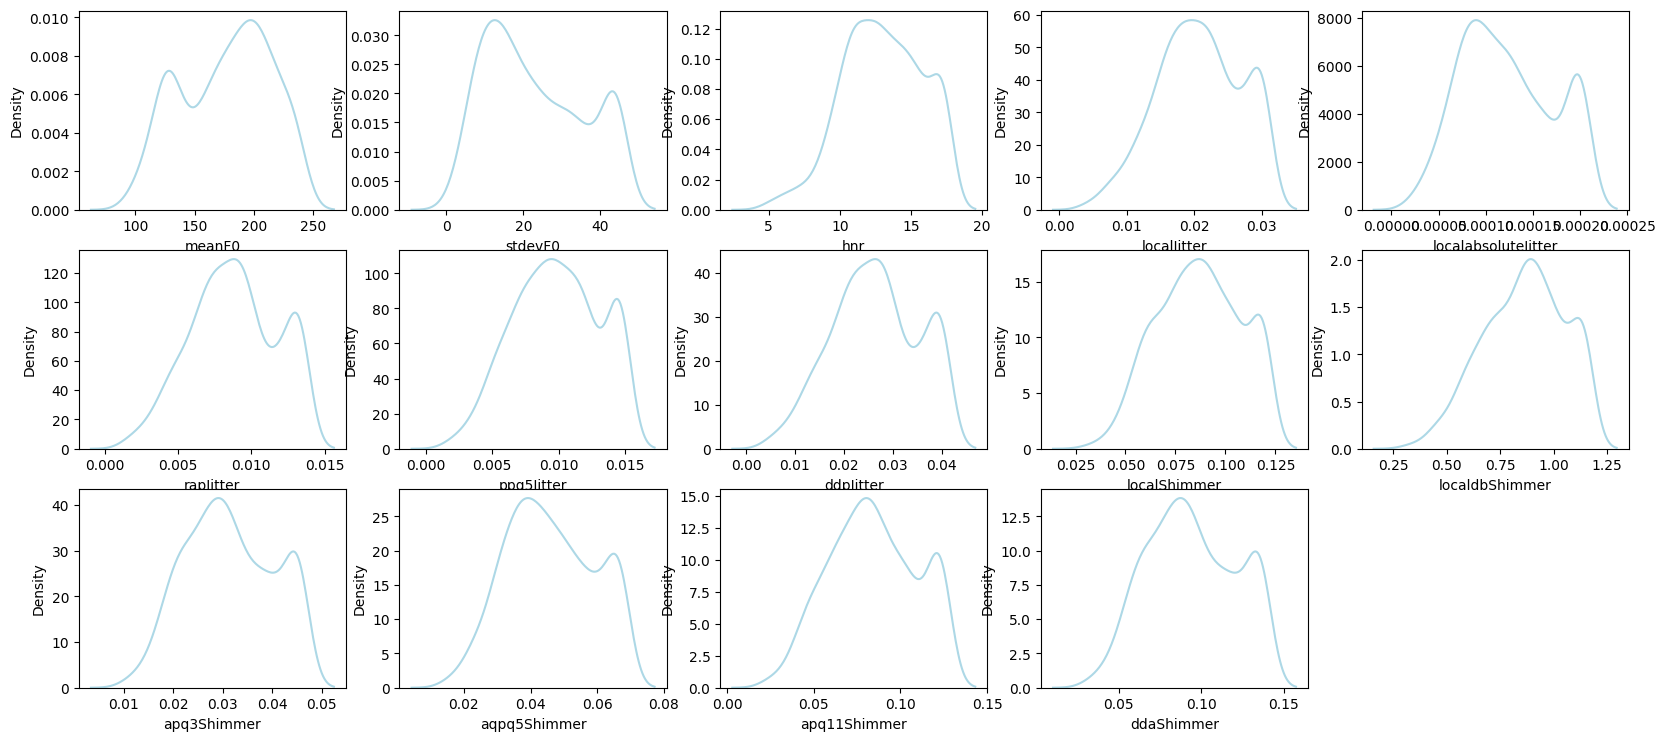

In [194]:
if display_analysis:
    getKdeplots()

### checking and removing multi-colinearity

As displayed in the heatmap before, certain independent attributes have high correlations. Multicollinearity can be a problem for us, because we could not be able to determine the effects of each independent variables on the dependent variable.

We can compute the Variable Inflation Factors (VIF) score for each independent variable. It represents how well the variable can be explained by others. We can try to remove variables with high VIF scores in order to reduce multicollinearity.

In [195]:
reduced_features_df = removed_outliers.copy() #create a copy to perform the trials


def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(round(reduced_features_df,2))

/Users/tomas/Documents/Tese/Predictive-models-Parkinson/venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,meanF0,32.226885
1,stdevF0,6.082298
2,hnr,22.607665
3,localJitter,33.349223
4,localabsoluteJitter,NaN
5,rapJitter,22.473502
6,ppq5Jitter,27.518547
7,ddpJitter,32.473632
8,localShimmer,263.909442
9,localdbShimmer,187.567602


In [196]:
# reduced_features_df=reduced_features_df.drop(['localabsoluteJitter'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [197]:
# reduced_features_df=reduced_features_df.drop(['localShimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [198]:
# reduced_features_df=reduced_features_df.drop(['ddaShimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [199]:
# reduced_features_df=reduced_features_df.drop(['localdbShimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [200]:
# reduced_features_df=reduced_features_df.drop(['aqpq5Shimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [201]:
# reduced_features_df=reduced_features_df.drop(['ddpJitter'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [202]:
# reduced_features_df=reduced_features_df.drop(['ppq5Jitter'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [203]:
# reduced_features_df=reduced_features_df.drop(['meanF0'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [204]:
# reduced_features_df=reduced_features_df.drop(['apq11Shimmer'],axis=1)
# calc_vif(round(reduced_features_df,2))

In [205]:
# reduced_features_df=reduced_features_df.drop(['localJitter'],axis=1)
# calc_vif(round(reduced_features_df,2))

We removed the variable with the highest VIF iteratively until all variables showed a low enough score (<10) <br>

In [206]:
def runPCA(df):
    #Z-score the Jitter and Shimmer measurements
    features = ['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
                'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer', ]
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    #y = df.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #PCA
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['JitterPCA', 'ShimmerPCA'])
    principalDf
    return principalDf

# pcaData = runPCA(reduced_features_df)

# reduced_features_df = pd.concat([reduced_features_df.reset_index(drop=True),pcaData.reset_index(drop=True)], axis=1)

# reduced_features_df=reduced_features_df.drop(['localJitter', 'localabsoluteJitter', 'rapJitter', 'ppq5Jitter', 'ddpJitter',
#                 'localShimmer', 'localdbShimmer', 'apq3Shimmer', 'aqpq5Shimmer', 'apq11Shimmer', 'ddaShimmer'],axis=1)


In [207]:
reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,114.559712,11.523052,14.191471,0.028422,0.000200,0.013322,0.013165,0.039966,0.118936,1.146329,0.038164,0.066882,0.123398,0.114493,1.0
1,237.779233,18.861410,17.313612,0.011556,0.000047,0.004619,0.005859,0.013858,0.053902,0.492988,0.021755,0.031201,0.069907,0.065264,1.0
2,223.685833,44.053187,15.327212,0.020620,0.000093,0.009925,0.007579,0.029775,0.063626,0.763410,0.025858,0.028366,0.040768,0.077573,1.0
3,132.029628,12.062114,12.557775,0.017816,0.000135,0.007793,0.008405,0.023378,0.083822,0.738992,0.030570,0.050306,0.094678,0.091711,1.0
4,175.314689,15.264781,13.798862,0.013002,0.000074,0.005781,0.007909,0.017344,0.104535,1.010369,0.036758,0.062875,0.123398,0.110275,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,193.209988,22.001734,13.987776,0.016422,0.000085,0.007082,0.009177,0.021245,0.086505,0.940830,0.033335,0.049701,0.091187,0.100005,0.0
810,117.653228,8.975167,12.096987,0.023460,0.000199,0.009138,0.011369,0.027414,0.093464,0.816516,0.031271,0.048431,0.106553,0.093812,0.0
811,209.829420,44.053187,7.536627,0.027930,0.000133,0.012246,0.014303,0.036737,0.112934,1.146329,0.041220,0.058284,0.105104,0.123659,0.0
812,153.326690,19.930532,12.334277,0.030168,0.000200,0.013322,0.014716,0.039966,0.076875,0.762129,0.023152,0.036592,0.071444,0.069456,0.0


In [208]:
reduced_features_df

,meanF0,stdevF0,hnr,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,PD
0,114.559712,11.523052,14.191471,0.028422,0.000200,0.013322,0.013165,0.039966,0.118936,1.146329,0.038164,0.066882,0.123398,0.114493,1.0
1,237.779233,18.861410,17.313612,0.011556,0.000047,0.004619,0.005859,0.013858,0.053902,0.492988,0.021755,0.031201,0.069907,0.065264,1.0
2,223.685833,44.053187,15.327212,0.020620,0.000093,0.009925,0.007579,0.029775,0.063626,0.763410,0.025858,0.028366,0.040768,0.077573,1.0
3,132.029628,12.062114,12.557775,0.017816,0.000135,0.007793,0.008405,0.023378,0.083822,0.738992,0.030570,0.050306,0.094678,0.091711,1.0
4,175.314689,15.264781,13.798862,0.013002,0.000074,0.005781,0.007909,0.017344,0.104535,1.010369,0.036758,0.062875,0.123398,0.110275,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,193.209988,22.001734,13.987776,0.016422,0.000085,0.007082,0.009177,0.021245,0.086505,0.940830,0.033335,0.049701,0.091187,0.100005,0.0
810,117.653228,8.975167,12.096987,0.023460,0.000199,0.009138,0.011369,0.027414,0.093464,0.816516,0.031271,0.048431,0.106553,0.093812,0.0
811,209.829420,44.053187,7.536627,0.027930,0.000133,0.012246,0.014303,0.036737,0.112934,1.146329,0.041220,0.058284,0.105104,0.123659,0.0
812,153.326690,19.930532,12.334277,0.030168,0.000200,0.013322,0.014716,0.039966,0.076875,0.762129,0.023152,0.036592,0.071444,0.069456,0.0


In [209]:
reduced_features_df=reduced_features_df.drop(['PD'],axis=1)

In [210]:
features = 'mdvr_features.csv'
reduced_features = 'mdvr_reduced_features.csv'

outdir = '../data/tables/'
if not os.path.exists(outdir):
    os.mkdir(outdir)

original_features_df.to_csv(os.path.join(outdir, features),index=False)
reduced_features_df.to_csv(os.path.join(outdir, reduced_features),index=False)

Numerical features are standardized and saved to csv files